In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv("Games_with_ranking.csv")
df.head(2)

,AppID,QueryName,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Achievements,Publishers,Year,...,Sales,avg_playtime,YearDifference,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,TotalPoints,Budget_AA,Budget_AAA,Budget_Indie
0,550,Left 4 Dead 2,1,140726,1,15574539,13583400,101.0,Valve,2009.0,...,1.555896e+08,139.148381,15.0,812793.0,1.0,1.0,28,0,1,0
1,240,Counter-Strike: Source,1,53931,1,15433570,11472993,147.0,Valve,2004.0,...,1.541814e+08,195.383450,20.0,157463.0,1.0,0.0,28,0,1,0


In [3]:
most_releases_year = df['Year'].value_counts().idxmax()

print(f'The year with the most game releases is {most_releases_year}')

The year with the most game releases is 2016.0


In [4]:
df[["QueryName","Year","Month"]][df["Year"]==2016]

,QueryName,Year,Month
22,The Elder Scrolls V: Skyrim Special Edition,2016.0,10.0
27,Don't Starve Together,2016.0,4.0
48,BioShock Remastered,2016.0,9.0
61,BioShock 2 Remastered,2016.0,9.0
86,Starbound,2016.0,7.0
...,...,...,...
8151,Starry Nights : Helix,2016.0,11.0
8152,Arena Master,2016.0,11.0
8154,Skill Master VR -- Learn Meditation,2016.0,11.0
8156,Fan Fun,2016.0,11.0


In [5]:
most_releases_year = df['Year'].value_counts().idxmax()
df_filtered = df[df['Year'] == most_releases_year]
most_releases_month = df_filtered['Month'].value_counts().idxmax()

games_in_most_common_month = df_filtered[df_filtered['Month'] == most_releases_month]

print(f"The most common year for game releases is {most_releases_year}")
print(f"The most common month in {most_releases_year} is {most_releases_month}")
print("Games released in the most common month:")
games_in_most_common_month[['QueryName', 'Month','RecommendationCount']]


The most common year for game releases is 2016.0
The most common month in 2016.0 is 8.0
Games released in the most common month:


,QueryName,Month,RecommendationCount
130,Titan Quest Anniversary Edition,8.0,1826
337,No Man's Sky,8.0,68725
624,Deus Ex: Mankind Divided™,8.0,9101
911,Kingdom: New Lands,8.0,735
968,Lost Castle,8.0,3387
...,...,...,...
8096,Bloxiq VR,8.0,0
8098,Puzzling Rooms VR,8.0,0
8099,ikenie,8.0,0
8100,Echoes of the Fey - The Fox's Trail,8.0,0


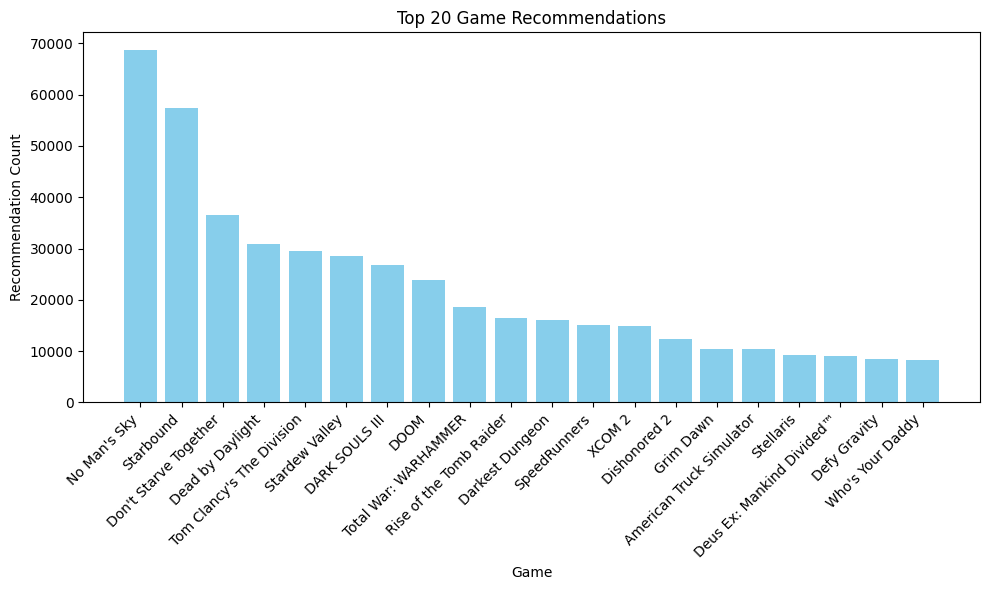

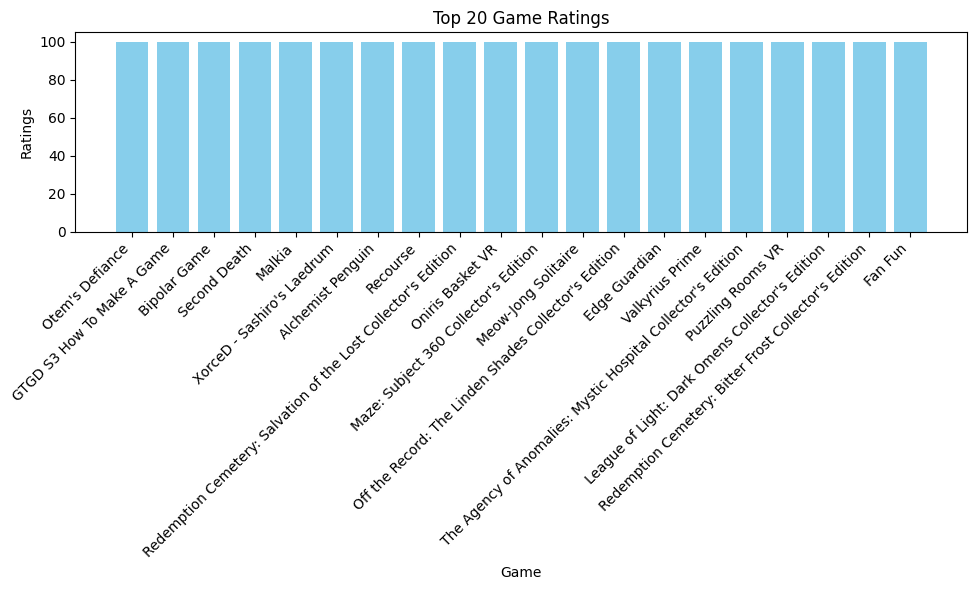

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming games_in_most_common_month is your DataFrame
top_20_games_reo = df_filtered.nlargest(20, 'RecommendationCount')

# Static plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_20_games_reo['QueryName'], top_20_games_reo['RecommendationCount'], color='skyblue')
plt.xlabel('Game')
plt.ylabel('Recommendation Count')
plt.title('Top 20 Game Recommendations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Assuming games_in_most_common_month is your DataFrame
top_20_games_ratings = df_filtered.nlargest(20, 'rating')

# Static plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_20_games_ratings['QueryName'], top_20_games_ratings['rating'], color='skyblue')
plt.xlabel('Game')
plt.ylabel('Ratings')
plt.title('Top 20 Game Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

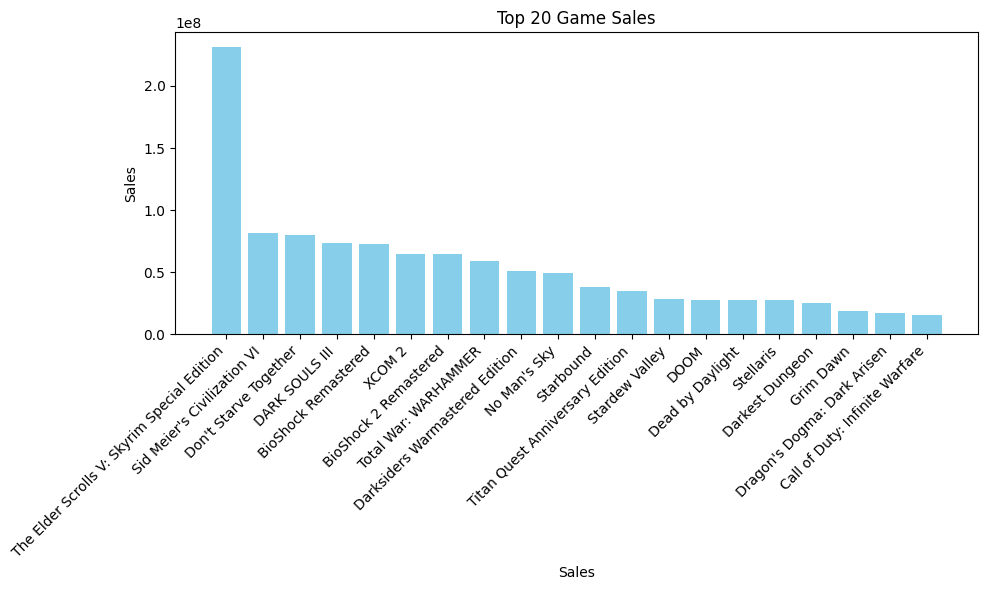

In [7]:
top_20_games_sales = df_filtered.nlargest(20, 'Sales')

# Static plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_20_games_sales['QueryName'], top_20_games_sales['Sales'], color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Sales')
plt.title('Top 20 Game Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [8]:
top_20_games_reo[["QueryName","Price","age_ranking","Publishers","rating"]]

,QueryName,Price,age_ranking,Publishers,rating
337,No Man's Sky,59.99,4.0,Hello Games,80.291173
86,Starbound,14.99,4.0,Chucklefish,92.497410
27,Don't Starve Together,14.99,4.0,Klei Entertainment,95.710281
174,Dead by Daylight,19.99,2.0,Behaviour Interactive Inc.,80.343308
290,Tom Clancy's The Division,4.49,2.0,Ubisoft,69.972732
122,Stardew Valley,14.99,4.0,ConcernedApe,98.269543
197,DARK SOULS III,59.99,2.0,"FromSoftware, Inc.,Bandai Namco Entertainment",94.340858
171,DOOM,19.99,2.0,Bethesda Softworks,95.388428
271,Total War: WARHAMMER,59.99,4.0,"SEGA,Feral Interactive (Linux),Feral Interacti...",77.739215
212,Rise of the Tomb Raider,5.99,2.0,"Crystal Dynamics,Feral Interactive (Mac),Feral...",93.976508


In [9]:
top_20_games_reo[["QueryName"]][top_20_games_reo["Price"]==0]

,QueryName


In [10]:
most_releases_year = 2015
df_filtered2015 = df[df['Year'] == most_releases_year]
most_releases_month2015 = df_filtered2015['Month'].value_counts().idxmax()
games_in_most_common_month2015 = df_filtered2015[df_filtered['Month'] == most_releases_month2015]
top_20_games2015 = games_in_most_common_month2015.nlargest(20, 'RecommendationCount')
plt.figure(figsize=(14, 7))
plt.bar(top_20_games2015['QueryName'], top_20_games2015['RecommendationCount'], color='skyblue')
plt.title('Top 20 Game Recommendations in the Most Common Month of 2014')
plt.xlabel('Game')
plt.ylabel('Recommendation Count')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\extra\AppData\Local\Temp\ipykernel_17924\256495388.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_in_most_common_month2015 = df_filtered2015[df_filtered['Month'] == most_releases_month2015]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

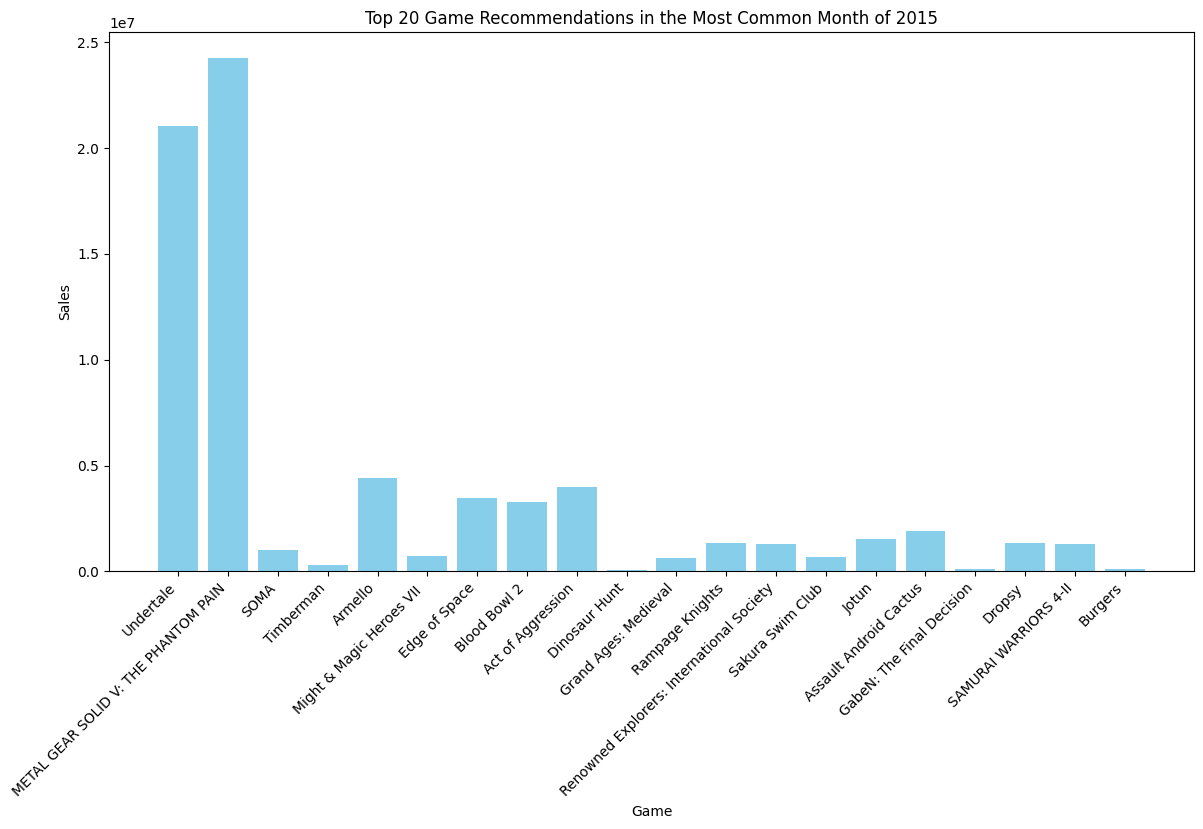

In [28]:
# Plotting with Matplotlib
plt.figure(figsize=(14, 7))
plt.bar(top_20_games2015['QueryName'], top_20_games2015['Sales'], color='skyblue')
plt.title('Top 20 Game Recommendations in the Most Common Month of 2015')
plt.xlabel('Game')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
year2014=df[["QueryName","Year","Month"]][df["Year"]==2014]

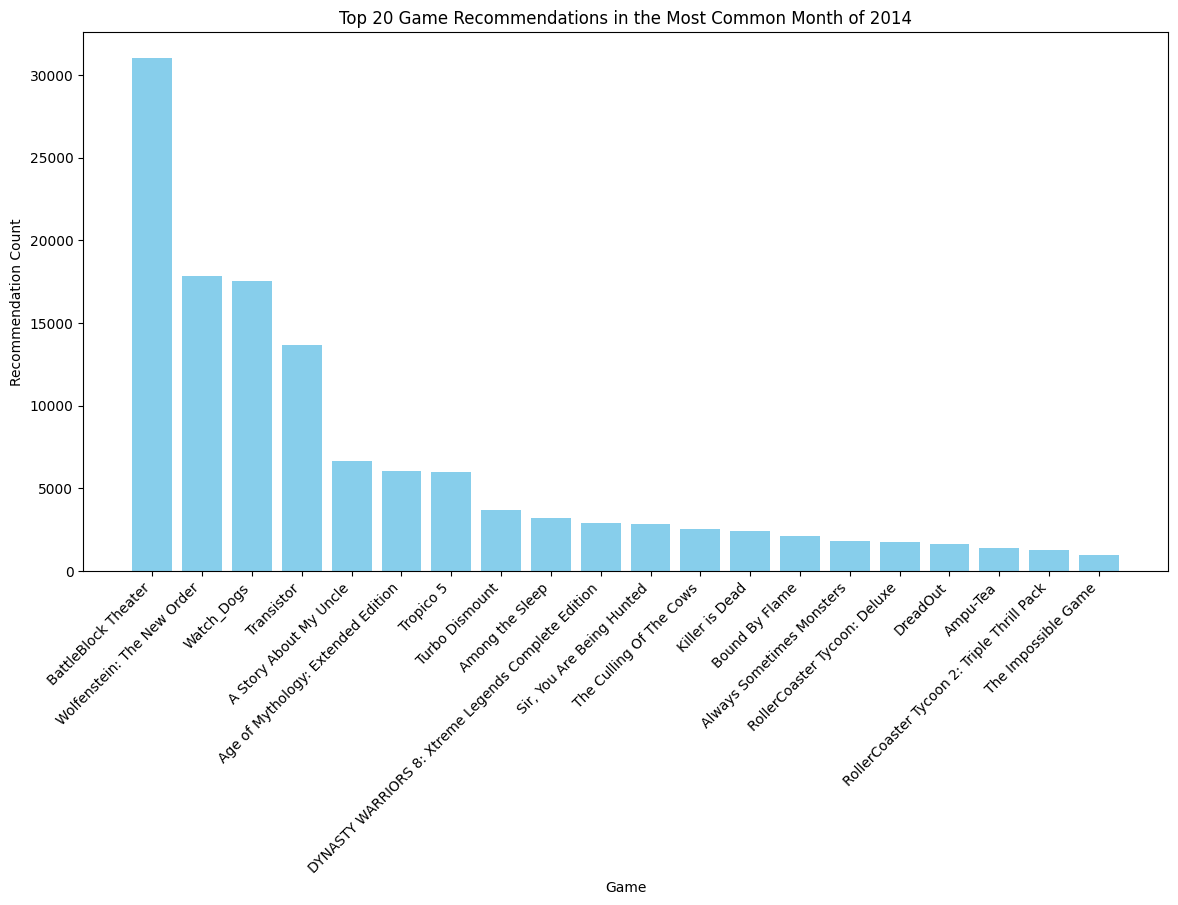

In [29]:
most_releases_year = 2014
df_filtered2014 = df[df['Year'] == most_releases_year]
most_releases_month2014 = df_filtered2014['Month'].value_counts().idxmax()
games_in_most_common_month2014 = df_filtered2014[df_filtered2014['Month'] == most_releases_month2014]
top_20_games2014 = games_in_most_common_month2014.nlargest(20, 'RecommendationCount')

# Plotting with Matplotlib
plt.figure(figsize=(14, 7))
plt.bar(top_20_games2014['QueryName'], top_20_games2014['RecommendationCount'], color='skyblue')
plt.title('Top 20 Game Recommendations in the Most Common Month of 2014')
plt.xlabel('Game')
plt.ylabel('Recommendation Count')
plt.xticks(rotation=45, ha='right')
plt.show()


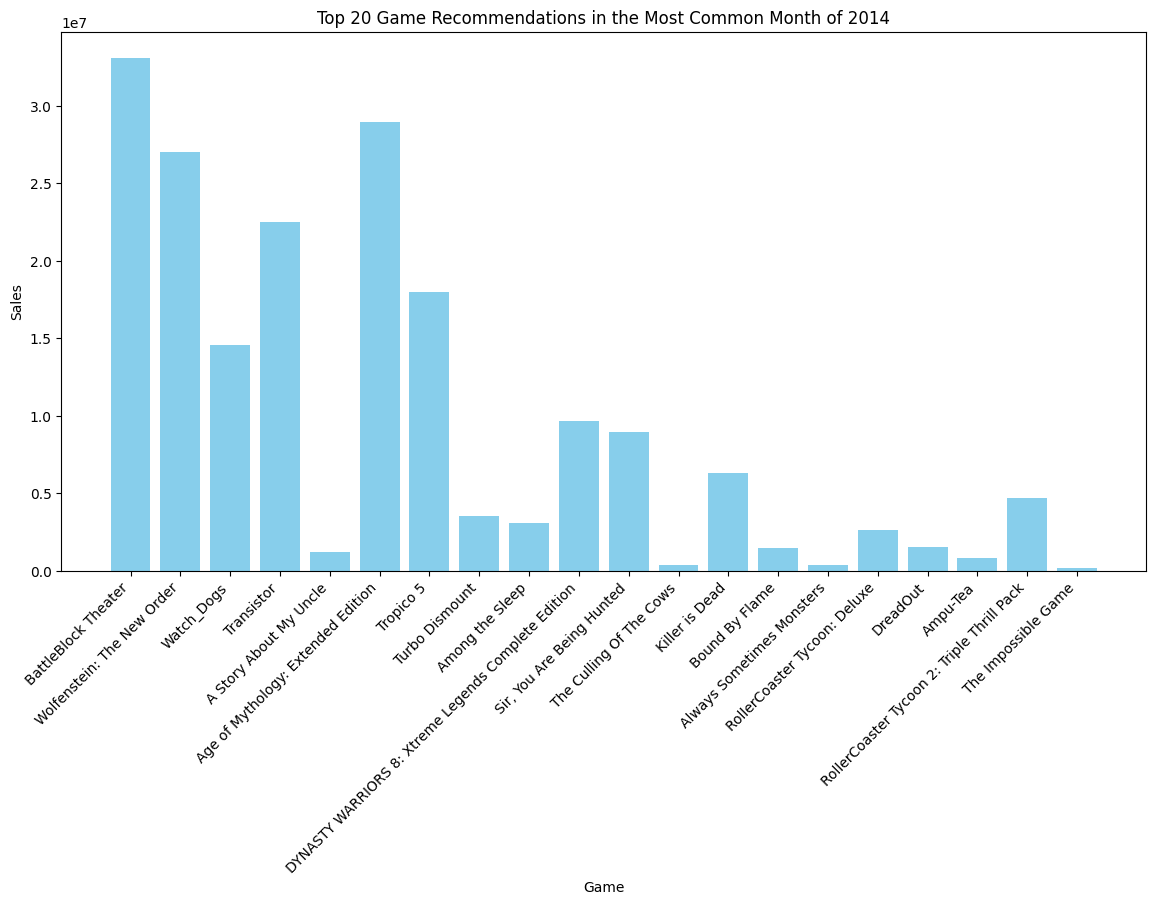

In [30]:
# Plotting with Matplotlib
plt.figure(figsize=(14, 7))
plt.bar(top_20_games2014['QueryName'], top_20_games2014['Sales'], color='skyblue')
plt.title('Top 20 Game Recommendations in the Most Common Month of 2014')
plt.xlabel('Game')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


In [38]:
top_20_games[["QueryName","age_ranking", "Publishers","rating"]]

,QueryName,age_ranking,Publishers,rating
111,Undertale,4.0,tobyfox,96.651347
203,METAL GEAR SOLID V: THE PHANTOM PAIN,3.0,KONAMI,91.396767
753,SOMA,2.0,Frictional Games,95.958656
862,Timberman,4.0,Forever Entertainment S. A.,93.279238
1206,Armello,4.0,League of Geeks,81.928960
1768,Might & Magic Heroes VII,4.0,Ubisoft,54.446577
990,Edge of Space,4.0,Reverb Triple XP,33.933824
1257,Blood Bowl 2,4.0,Nacon,78.639769
1422,Act of Aggression,4.0,Eugen Systems,66.152363
2281,Dinosaur Hunt,4.0,ANPA.US,67.036450
